In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df= pd.read_csv("Cleaned_dataset.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Target Variable Analysis

In [21]:
churn_dist = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100
pd.concat([churn_dist, churn_pct], axis=1, keys=['Count', 'Percentage'])

,Count,Percentage
Churn,,
No,5174,73.463013
Yes,1869,26.536987


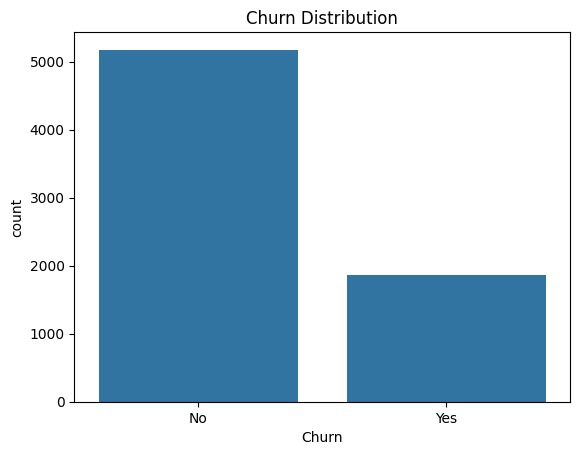

In [22]:

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

##### A significant proportion of customers have churned, indicating a serious retention challenge.The churn class is underrepresented compared to retained customers, highlighting class imbalance that must be considered during model evaluation.

## Univariate Analysis


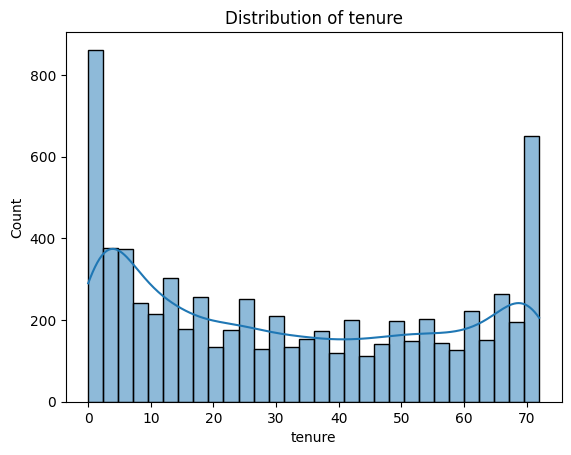

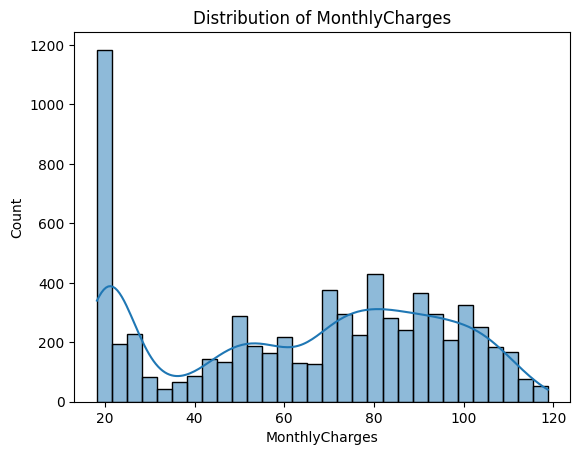

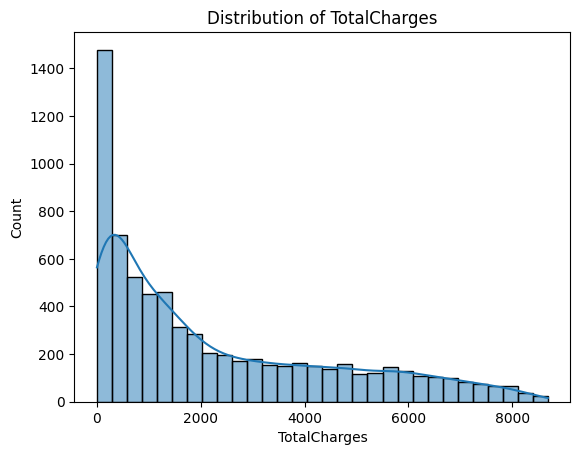

In [19]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


##### Tenure shows a skewed distribution with a large number of customers in early months, while MonthlyCharges and TotalCharges show wide variability, suggesting diverse pricing plans and usage patterns.

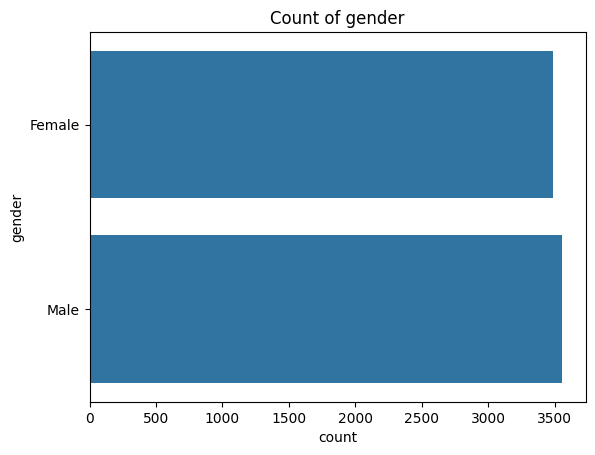

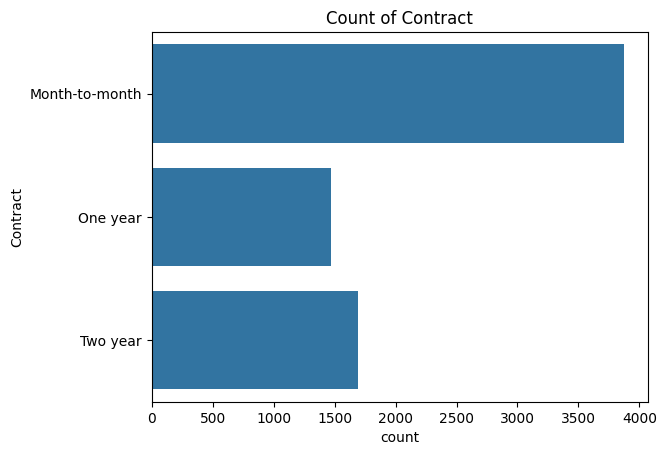

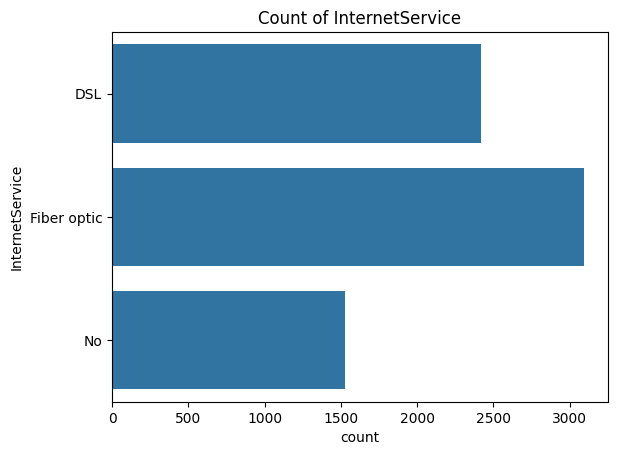

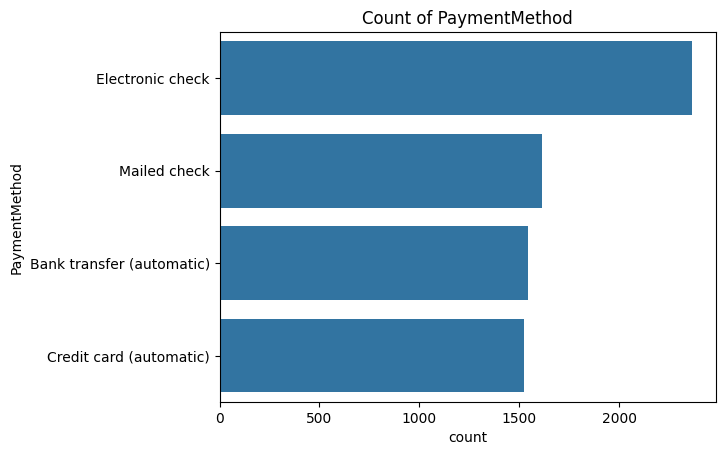

In [10]:
cat_cols = ['gender', 'Contract', 'InternetService', 'PaymentMethod']

for col in cat_cols:
    sns.countplot(y=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

## Bivariate Analysis

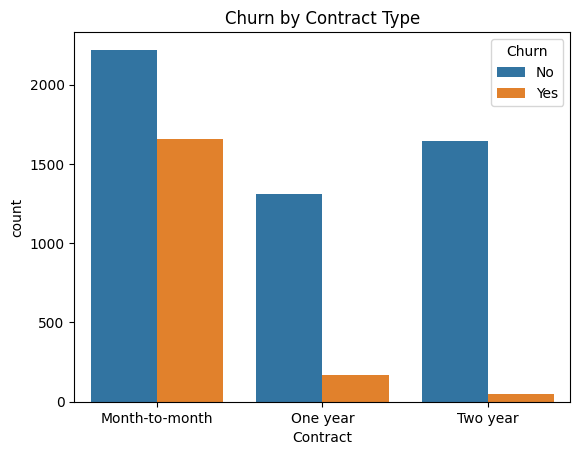

In [11]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

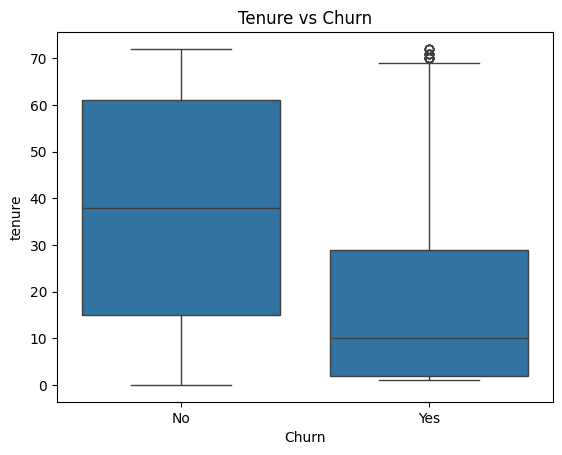

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

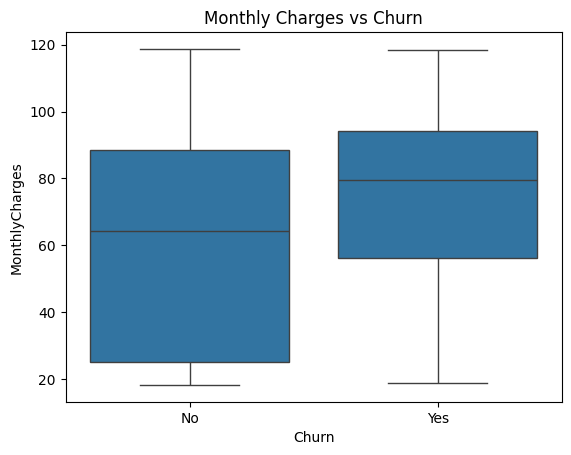

In [13]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

## Multivariate Analysis

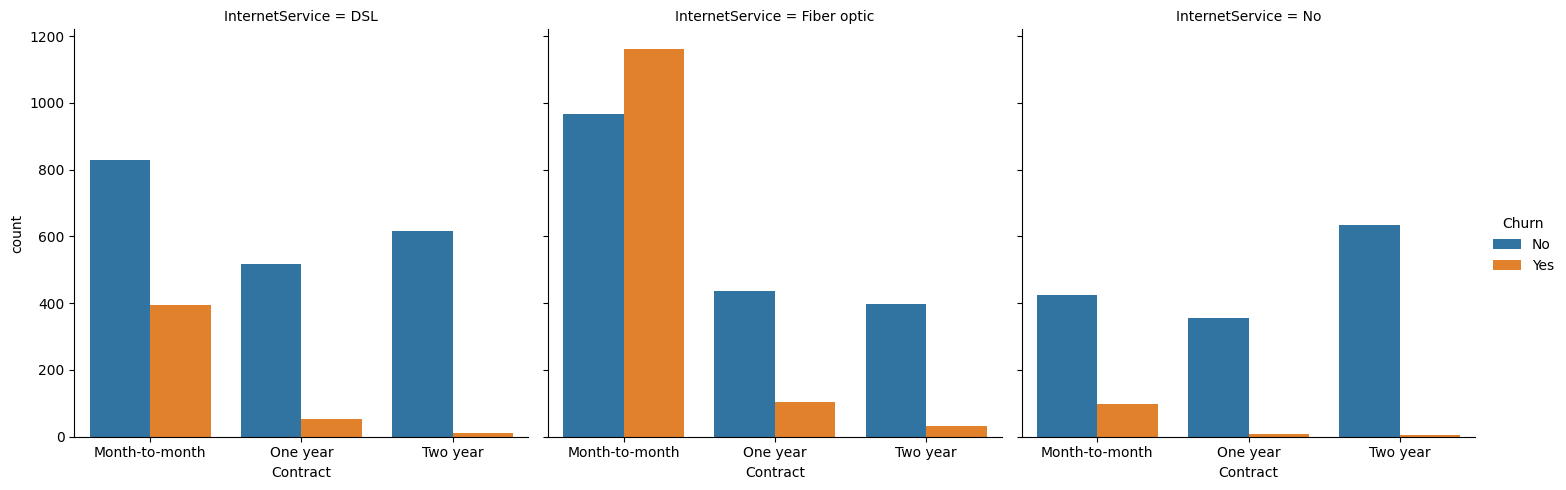

In [14]:
sns.catplot(
    x="Contract",
    hue="Churn",
    col="InternetService",
    data=df,
    kind="count"
)
plt.show()

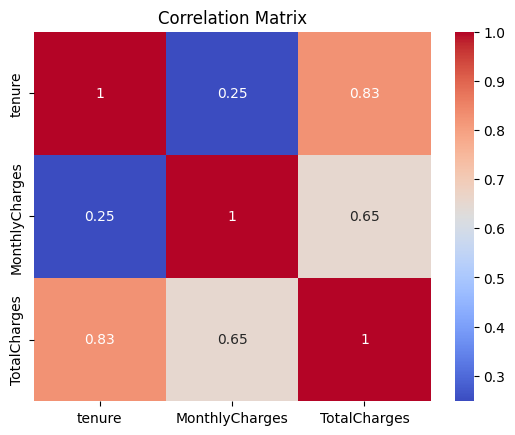

In [15]:
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()